# **Exploratory Data Analysis**

**Author:** Vikram Grewal

## **Purpose of Notebook**

Before starting starting to think about how to preprocess and augment the data, it is important to gain an understanding of the overall insights of the raw, untouched data. 
From here we can draw conclusions about choosing processing methods to use the data effectively for training a classification model.

## **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torchaudio

from src.utillity import EDA

eda = EDA()

## **Looking at the Raw Data**

The `data/raw` folder contains audio sample files for drum instruments including hi-hats, snares, and kicks where each sample only contains a single hit of that instrument. It is organized such that there is an equal distribution of samples for each class and all samples have a sample frequency of `41000 Hz`. A file called `_samples.csv` gives an overview of the data by including columns for the file name, sample length in seconds, average loudness in decibels, the class as a string, and the class id as an integer.

In [2]:
raw_data = pd.read_csv('data/raw/_samples.csv', index_col=None)
raw_data.head()

,file,length,avg_db,class,class_id
0,hi-hat_001.wav,0.1035,-65.2291,hi-hat,1
1,hi-hat_002.wav,0.4307,-72.2919,hi-hat,1
2,hi-hat_003.wav,0.3285,-68.8747,hi-hat,1
3,hi-hat_004.wav,0.2780,-66.5489,hi-hat,1
4,hi-hat_005.wav,0.2927,-58.2742,hi-hat,1


### **Basic Data Information**

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   file      750 non-null    object 
 1   length    750 non-null    float64
 2   avg_db    750 non-null    float64
 3   class     750 non-null    object 
 4   class_id  750 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 29.4+ KB


In [4]:
raw_data.drop(['class_id'], axis=1).describe()

,length,avg_db
count,750.000000,750.000000
mean,0.517471,-63.962939
std,0.434446,6.964555
min,0.063400,-86.307700
25%,0.208500,-68.554950
50%,0.337650,-63.897700
75%,0.743000,-59.237650
max,2.962500,-38.793300


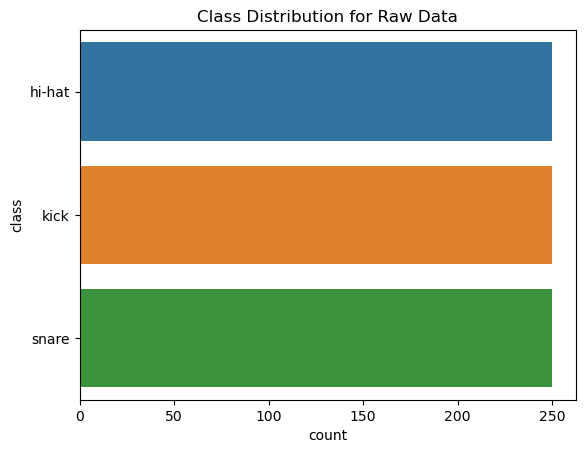

In [5]:
eda.plot_class_counts(raw_data, 'raw')

From the output above, we see that we have no missing files in the dataset and we have 250 observations for each class. Let's now plot at a few random sample waveforms for each class to look how the data is shaped in amplitude over time.

### **Looking at Raw Waveforms**

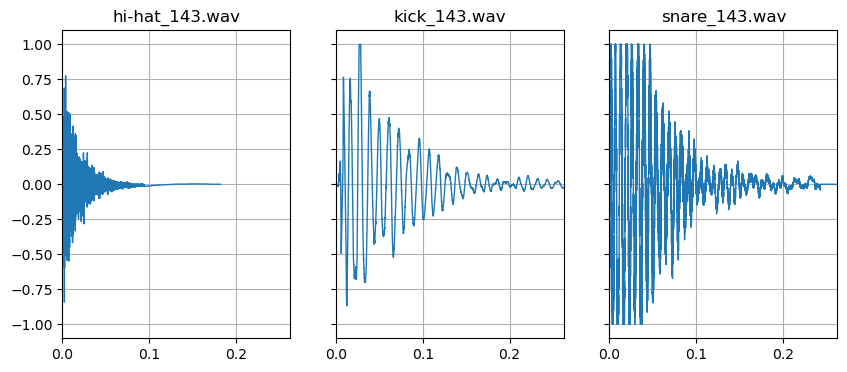

In [15]:
classes = raw_data['class'].unique()
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
axes = axes.flatten()

for ax, c in zip(axes, classes):
    random_sample = raw_data[raw_data['class'] == c].sample(1, random_state=42).values[0][0]
    file_path = f'data/raw/{random_sample}'
    raw_signal = torchaudio.load(file_path)
    eda.plot_waveform(raw_signal[0], title=random_sample, ax=ax)

From the output above we see that not only do the samples differ greatly in their waveform amplitudes, but they also differ in their overall sample length as well. We can also see that there is a region of the waveform where the amplitude is large (attack) and a region where the amplitude is low (tail). The attack portion of the sample is typically where most of the sonic information is for quick impulse instruments such as drums, and the tail typically is usually made up of noise from the instrument release. For classification training, the attack of the sample is much more important than the tail as it not only contains more information, but it will also dominate the low value information found in the tail.

### **Examining Sample Lengths**

In [ ]:
class_sample_length = raw_data.groupby('class').sum()['length']
class_sample_length

class
hi-hat     78.1990
kick      177.3974
snare     132.5068
Name: length, dtype: float64

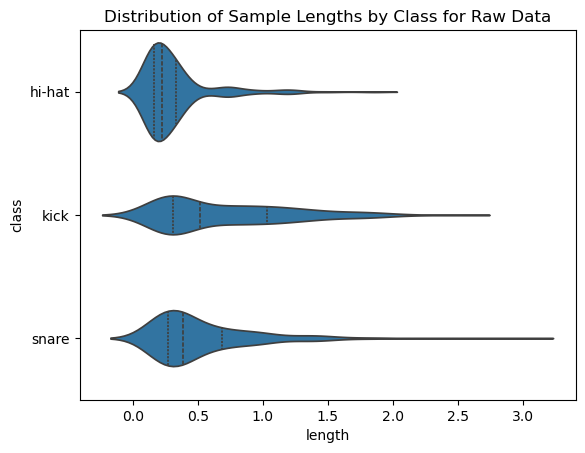

In [ ]:
eda.plot_sample_len_dist(raw_data, 'raw')

 Though the distribution for the number of samples in each class is equal, the total length of samples by each class is not. It is important that the sample lengths are equal for training as configuring the model to use varying sample lengths is not a viable approach. One method to remedy this is to